In [1]:
!pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 511.7 MB 4.9 kB/s 


In [2]:
import tensorflow as tf
tf.__version__

'2.9.1'

In [10]:
### Importing basic librarties
import numpy as np

In [11]:
import pandas as pd

In [12]:
import matplotlib.pyplot as plt

In [62]:
dataset= pd.read_csv('/content/ANN_ChurnModelling/Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [63]:
## division of dataset into independent and dependetn features
X = dataset.iloc[:,3:13]
y=dataset.iloc[:,13]

In [64]:
## Feature Engineering
geography = pd.get_dummies(X['Geography'], drop_first = True)
geography.head()


,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1


In [65]:
gender = pd.get_dummies(X['Gender'], drop_first = True)

In [66]:
## concatenation
X = X.drop(['Geography','Gender'], axis = 1)
X = pd.concat([X,geography,gender], axis = 1)

In [67]:
# Splitting the dataset into train set and test set
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [68]:
#feauture scaling
from sklearn.preprocessing import StandardScaler

In [69]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [70]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [39]:
X_train.shape

(8000, 11)

In [ ]:
## lets create the ANN


In [71]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU
from tensorflow.keras.layers import Dropout

In [72]:
### inittialize the ANN
classifier = Sequential()

## add input layers
classifier.add(Dense(units = 11, activation = 'relu'))

In [73]:
## adding the hidden layers
classifier.add(Dense(units = 7, activation = 'relu'))
classifier.add(Dense(units = 6, activation = 'relu'))

In [74]:
## addding output layers
classifier.add(Dense(units = 1, activation='sigmoid'))

In [75]:
opt = tf.keras.optimizers.Adam(learning_rate=0.01) ## manual learningrate of the optimizer
classifier.compile(optimizer=opt,loss='binary_crossentropy', metrics=['accuracy'])

In [76]:
## early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [77]:
model_history = classifier.fit(X_train,y_train, validation_split=0.33, batch_size=10, epochs = 1000, callbacks = early_stopping) 

Epoch 1/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.4348 - accuracy: 0.8181 - val_loss: 0.4096 - val_accuracy: 0.8289
Epoch 2/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3700 - accuracy: 0.8502 - val_loss: 0.3770 - val_accuracy: 0.8451
Epoch 3/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3547 - accuracy: 0.8556 - val_loss: 0.3658 - val_accuracy: 0.8482
Epoch 4/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3491 - accuracy: 0.8584 - val_loss: 0.3593 - val_accuracy: 0.8531
Epoch 5/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3479 - accuracy: 0.8576 - val_loss: 0.3739 - val_accuracy: 0.8368
Epoch 6/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3453 - accuracy: 0.8574 - val_loss: 0.3640 - val_accuracy: 0.8512
Epoch 7/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3460 - accuracy: 0.8574 - val_loss: 0.3594 - val_accuracy:

In [78]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

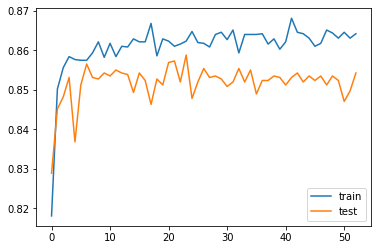

In [79]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.legend(['train','test'])

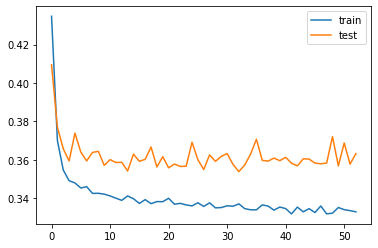

In [80]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.legend(['train', 'test'])

In [81]:
### Making the predictions
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

63/63 [==============================] - 0s 3ms/step


In [86]:
## confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1503,   92],
       [ 190,  215]])

In [89]:
## accurcay
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
score

0.859

In [90]:
#get the weights 
classifier.get_weights()

[array([[ 0.1280192 ,  0.26833645,  0.04561054, -1.5419217 ,  0.80863774,
         -0.96626806,  0.06652021, -0.2790187 , -0.48342228,  0.1958235 ,
         -0.08920595],
        [-1.9318053 ,  0.46393773,  0.61852264, -1.5500958 ,  1.0477505 ,
         -0.50571966, -2.3158066 ,  1.0023391 ,  2.2329066 , -0.30097333,
         -3.8434756 ],
        [ 0.48625147,  0.06000166, -0.04977899,  0.04293231, -0.04468219,
          0.6521356 , -0.18009417,  0.23969878,  0.39201787,  0.19815415,
          0.35635263],
        [ 0.05625032, -2.5237088 ,  0.66243905,  0.4447497 , -0.10914464,
          0.4810457 , -0.16635409, -1.3479537 ,  0.1681781 , -0.44581285,
          0.7164283 ],
        [ 0.4608386 ,  1.453773  ,  4.1197248 ,  0.89606404,  1.6720588 ,
          0.71819156,  0.47390756, -2.9804986 ,  0.25088784, -0.25315377,
          0.06697968],
        [-0.79030555, -0.57431483, -0.28027105, -0.85506034, -0.55432916,
         -1.0224985 ,  0.43118903, -0.01074106,  0.63130903, -0.0800722